# Task 1 : Ascending the Gradient Descent [6 marks]

In [121]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim

In [122]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

Data Visualising

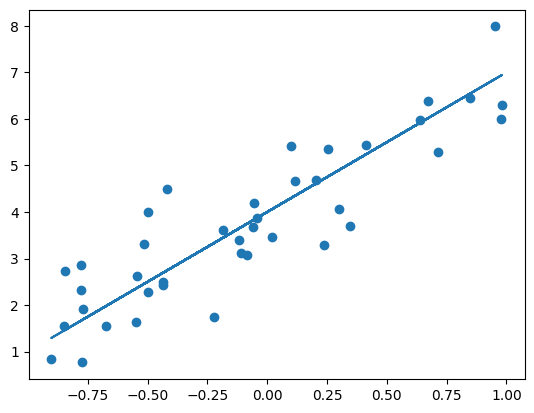

In [123]:
plt.plot(x1,f_x)
# plt.show()
plt.scatter(x1,y)

## 1.Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form $\theta_1x+\theta_0$ ) for any given values of ($\theta_0,\theta_1$). [1 Mark]

$\theta_0$=6.0

$\theta_1$=9.0

In [124]:
x_t=torch.tensor(x1,dtype=torch.float32)
y_t=torch.tensor(y,dtype=torch.float32)

theta_0=torch.tensor(6.0,requires_grad=True)
theta_1=torch.tensor(9.0,requires_grad=True)

def lin_reg(theta_0,theta_1,x):
    return theta_1*x+theta_0

y_hat=lin_reg(theta_0,theta_1,x_t)
sq_loss=torch.mean((y_hat-y_t)**2)

sq_loss.backward()

#True gardient=tg

tg_theta_0=theta_0.grad
tg_theta_1=theta_1.grad

print("True Gradient for Theta 0: ",round(tg_theta_0.item(),4))
print("True Gradient for Theta 1: ",round(tg_theta_1.item(),4))

True Gradient for Theta 0:  3.0285
True Gradient for Theta 1:  3.6436


## 2. Using the same ($\theta_0,\theta_1$) as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient. [1 mark]

Continuing with the same ($\theta_0$,$\theta_1$)

$\theta_0$=6.0

$\theta_1$=9.0

In [125]:
sgd_theta_0=[]
sgd_theta_1=[]
for i in range(len(x_t)):
    x=x_t[i]
    y_h=y_hat[i]
    y_i=y_t[i]

    sgd_0=2*((y_h-y_i))
    sgd_1=2*((y_h-y_i))*x
    sgd_theta_0.append(sgd_0)
    sgd_theta_1.append(sgd_1)

sgd_theta_0_t=torch.tensor(sgd_theta_0)
sgd_theta_1_t=torch.tensor(sgd_theta_1)
Estimate_sgd_0=sgd_theta_0_t.mean()
Estimate_sgd_1=sgd_theta_1_t.mean()
print("Estimate Through SGD for Theta 0 ,E[Theta 0]: ",round(Estimate_sgd_0.item(),4))
print("Estimate Through SGD for Theta 1 ,E[Theta 1]: ",round(Estimate_sgd_1.item(),4))

print("True Gradient for Theta 0: ",round(tg_theta_0.item(),4))
print("True Gradient for Theta 1: ",round(tg_theta_1.item(),4))

# Calculating Bias for the Estimator to check its quality
Bias_Theta_0=round(Estimate_sgd_0.item(),4)-round(tg_theta_0.item(),4)
Bias_Theta_1=round(Estimate_sgd_1.item(),4)-round(tg_theta_1.item(),4)

print("Bias Through SGD Estimator for Theta 0: ",Bias_Theta_0)
print("Bias Through SGD Estimator for Theta 1: ",Bias_Theta_1)

Estimate Through SGD for Theta 0 ,E[Theta 0]:  3.0285
Estimate Through SGD for Theta 1 ,E[Theta 1]:  3.6436
True Gradient for Theta 0:  3.0285
True Gradient for Theta 1:  3.6436
Bias Through SGD Estimator for Theta 0:  0.0
Bias Through SGD Estimator for Theta 1:  0.0


Thus, the Bias is zero of the SGD Estimator which testifies for the SGD being an unbiased estimator. 

## 3. Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ (or ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. [2 marks]

### Defining necessary functions

A function to find the predicted

In [126]:
def f(x,theta0,theta1):
    return theta1*x+theta0

finding minimum loss

In [127]:
x_mean=np.mean(x1)
y_mean=np.mean(y)
x_diff=x1-x_mean
y_diff=y-y_mean
b_theta1=np.sum(x_diff*y_diff)/np.sum((x_diff**2))
b_theta0=y_mean-b_theta1*x_mean
y_bh=f(x1,b_theta0,b_theta1)
b_loss=np.mean((y_bh-y)**2)
print("Best Theta0: ",b_theta0)
print("Best Theta1: ",b_theta1)
print("Minimum loss: ",b_loss)

Best Theta0:  3.950706402319453
Best Theta1:  2.6824689259670587
Minimum loss:  0.5957541565733316


From Scratch

In [128]:
def all_gd_scratch(x,y,theta0_i,theta1_i,lr,tol,batch_size,min_loss,r_seed=None):
    if r_seed is not None:
        np.random.seed(r_seed)
    n_epochs=0
    n=len(x)
    losses=[]
    theta0_s=[theta0_i]
    theta1_s=[theta1_i]
    theta0=theta0_i
    theta1=theta1_i
    while True:
        if batch_size is None:
            # Full Batch GD:
            y_hat= f(x,theta0,theta1)
            d_theta1=np.mean(2*(y_hat-y)*x)
            d_theta0=np.mean(2*(y_hat-y))
        
        else:
            #For Stochastic GD (SGD) and mini-batch GD:
            # SGD would be when number of batch size=1
            ind=np.random.choice(n,batch_size,replace=False)
            x_b=x[ind]
            y_b=y[ind]
            y_hat_b=f(x_b,theta0,theta1)
            d_theta1=np.mean(2*(y_hat_b-y_b)*x_b)
            d_theta0=np.mean(2*(y_hat_b-y_b))

        theta0-=lr*d_theta0
        theta1-=lr*d_theta1
        theta0_s.append(theta0)
        theta1_s.append(theta1)

        loss=np.mean((theta1*x +theta0-y)**2)
        losses.append(loss)
        n_epochs+=1
        if loss<(min_loss+tol):
            break
    return theta0,theta1,theta0_s,theta1_s,losses,n_epochs

Creating a linear model

In [129]:
class linmodel(nn.Module):
    def __init__(self):
        super(linmodel, self).__init__()
        self.theta0 = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))
        self.theta1 = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))

    def forward(self, x):
        return self.theta0 + self.theta1 * x

Using Torch libraries

In [130]:
def all_grad_torch(x,y,lr,tol,batch_size,min_loss,r_seed=None):
    if r_seed!=None:
        torch.manual_seed(r_seed)
    xt=torch.tensor(x,dtype=torch.float32)
    yt=torch.tensor(y,dtype=torch.float32)
    model= linmodel()
    opt=optim.SGD(model.parameters(),lr=lr)
    theta0_s=[model.theta0.item()]
    theta1_s=[model.theta1.item()]
    losses=[]
    epochs_count=0
    while True:
        opt.zero_grad()
        if batch_size==None:
            #Full-Batch
            y_hat=model(xt)
            loss=torch.mean((y_hat-yt)**2)
        else:
            ind=torch.randint(0,len(xt),(batch_size,))
            x_b=xt[ind]
            y_b=yt[ind]
            y_hat=model(x_b)
            loss=torch.mean((y_hat-y_b)**2)
        loss.backward()
        opt.step()
        losses.append(loss.item())
        theta0_s.append(model.theta0.item())
        theta1_s.append(model.theta1.item())
        epochs_count+=1
        # print(f'{epochs_count} epoch : loss= {loss.item()}')
        if loss.item()<min_loss+tol:
            # print(f"terminated at {epochs_count} epoch and loss : {loss.item()}")
            break
    return model.theta0.item(), model.theta1.item(), theta0_s, theta1_s, losses,epochs_count

In [131]:
def avg_iters_epochs(method,cases):
    t_iters=[]
    t_epochs=[]
    for i in range(cases):
        
        if method=='Full-Batch':
            theta0_fb_o,theta1_fb_o,theta_0_s_fb,theta_1_s_fb,losses_fb,fb_epochs=all_gd_scratch(x1,y,0,0,0.1,0.001,None,b_loss)
            t_epochs.append(fb_epochs)
            t_iters.append(fb_epochs)
        elif method=='mini-batch':
            theta0_mb_o,theta1_mb_o,theta_0_s_mb,theta_1_s_mb,losses_mb,mb_epochs=all_gd_scratch(x1,y,0,0,0.1,0.001,8,b_loss)
            t_epochs.append(mb_epochs)
            n_batchs=len(x1)//8
            mb_iters=n_batchs*mb_epochs
            t_iters.append(mb_iters)
        elif method=='sgd':
            theta0_sgd_o,theta1_sgd_o,theta_0_s_sgd,theta_1_s_sgd,losses_sgd,sgd_epochs=all_gd_scratch(x1,y,0,0,0.1,0.001,1,b_loss)
            t_epochs.append(sgd_epochs)
            sgd_iters=len(x1)*sgd_epochs
            t_iters.append(sgd_iters)
    m_iters=int(np.mean(t_iters))
    m_epochs=int(np.mean(t_epochs))
    return t_iters,m_iters,t_epochs,m_epochs


In [132]:
def plot_gd_contour(x, y, theta0_s, theta1_s, method):
    # Generate theta0 and theta1 values for contour grid
    theta0_vals = np.linspace(min(theta0_s) - 1, max(theta0_s) + 1, 100)
    theta1_vals = np.linspace(min(theta1_s) - 1, max(theta1_s) + 1, 100)
    
    # Create the mesh grid for plotting
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    
    # Calculate the loss for each combination of theta0 and theta1
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            Z[i, j] = np.mean((T1[i, j] * x + T0[i, j] - y)**2)
    
    # Plot contour
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
    plt.colorbar(contour)
    
    # Plot the path of gradient descent on the contour using thinner arrows
    plt.quiver(theta0_s[:-1], theta1_s[:-1], 
               np.diff(theta0_s), np.diff(theta1_s), 
               angles='xy', scale_units='xy', scale=1, color='red', width=0.0055, label=f'{method} Path')

    # Plot dots at each point of the gradient descent path with smaller size
    plt.scatter(theta0_s, theta1_s, color='black', marker='o', s=15, label='GD Points')

    # Add start and end markers for better visualization
    plt.scatter(theta0_s[0], theta1_s[0], color='green', marker='o', s=50, label='Start')
    plt.scatter(theta0_s[-1], theta1_s[-1], color='blue', marker='x', s=50, label='End')

    plt.title(f'Contour Plot of Loss Function and Gradient Descent Path using {method}')
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.legend()
    plt.show()


### Implementing

optimal thetas for:

for Full-Batch
3.943981231743238 2.6273364560194166
for mini-batch
3.959859655049945 2.6444705832933586
for sgd
3.950628517770126 2.659828198770324

final loss and epochs:

for Full-Batch
0.5966966139551279
64
for mini-batch
0.5963528875965423
61
for sgd
0.5959157656620172
48


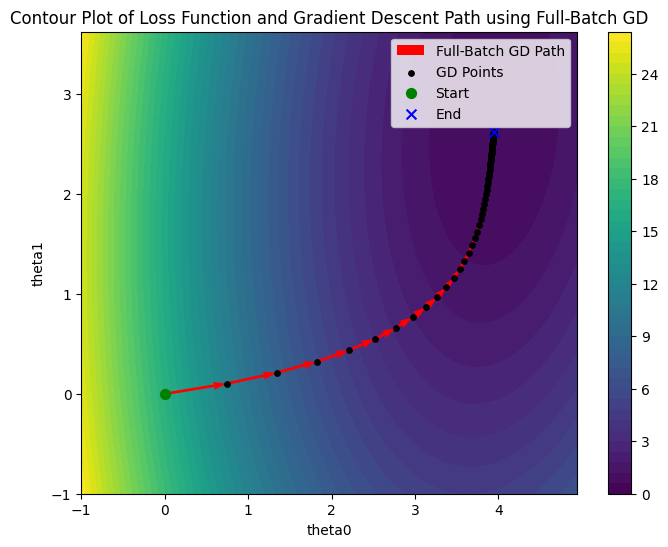

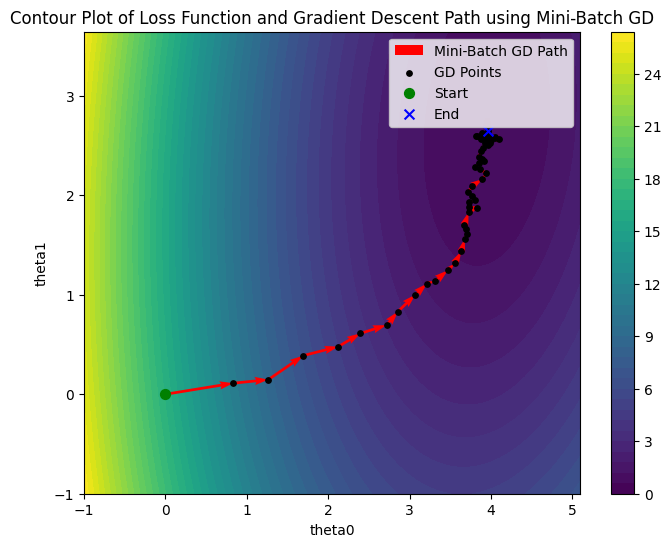

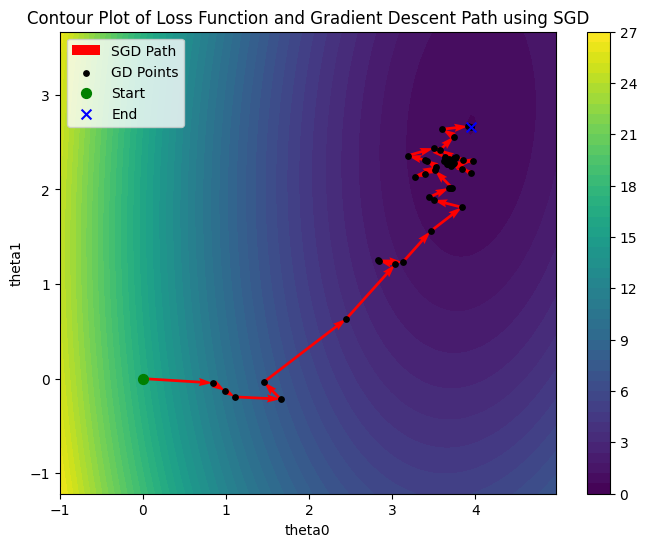

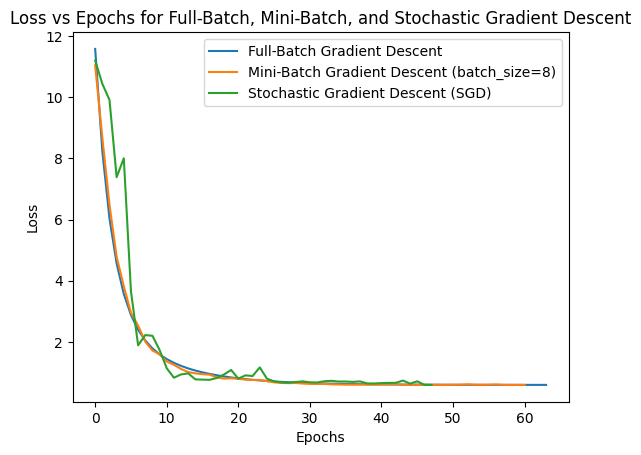

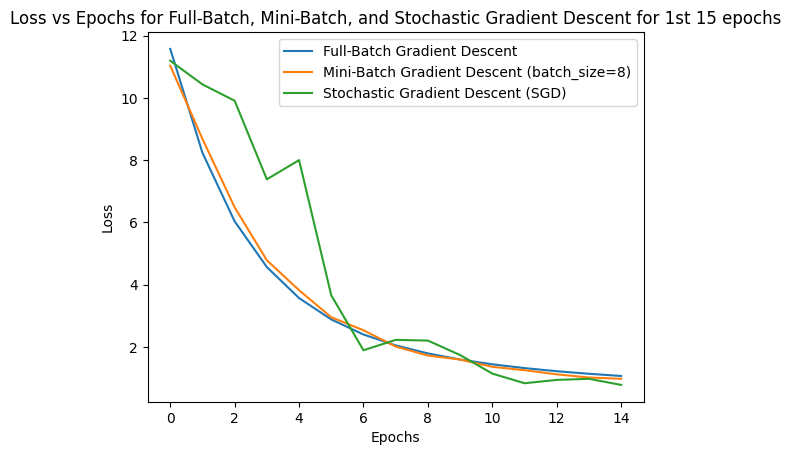

In [133]:
t0_i=0
t1_i=0
# Full Batch GD 
theta0_fb_o,theta1_fb_o,theta_0_s_fb,theta_1_s_fb,losses_fb,fb_epochs=all_gd_scratch(x1,y,t0_i,t1_i,0.1,0.001,None,b_loss,r_seed=45)
# Mini-Batch GD
theta0_mb_o,theta1_mb_o,theta_0_s_mb,theta_1_s_mb,losses_mb,mb_epochs=all_gd_scratch(x1,y,t0_i,t1_i,0.1,0.001,8,b_loss,r_seed=45)
#SGD
theta0_sgd_o,theta1_sgd_o,theta_0_s_sgd,theta_1_s_sgd,losses_sgd,sgd_epochs=all_gd_scratch(x1,y,t0_i,t1_i,0.1,0.001,1,b_loss,r_seed=45)
print('optimal thetas for:\n')
print('for Full-Batch')
print(theta0_fb_o,theta1_fb_o)
print('for mini-batch')
print(theta0_mb_o,theta1_mb_o)
print('for sgd')
print(theta0_sgd_o,theta1_sgd_o)
print('\nfinal loss and epochs:\n')
print('for Full-Batch')
print(losses_fb[-1])
print(fb_epochs)
print('for mini-batch')
print(losses_mb[-1])
print(mb_epochs)
print('for sgd')
print(losses_sgd[-1])
print(sgd_epochs)
plot_gd_contour(x1,y,theta0_s=theta_0_s_fb,theta1_s=theta_1_s_fb,method="Full-Batch GD")
plot_gd_contour(x1,y,theta0_s=theta_0_s_mb,theta1_s=theta_1_s_mb,method="Mini-Batch GD")
plot_gd_contour(x1,y,theta0_s=theta_0_s_sgd,theta1_s=theta_1_s_sgd,method="SGD")
plt.plot(losses_fb, label='Full-Batch Gradient Descent')
plt.plot(losses_mb, label='Mini-Batch Gradient Descent (batch_size=8)')
plt.plot(losses_sgd, label='Stochastic Gradient Descent (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Full-Batch, Mini-Batch, and Stochastic Gradient Descent')
plt.legend()
plt.show()
plt.plot(losses_fb[:15], label='Full-Batch Gradient Descent')
plt.plot(losses_mb[:15], label='Mini-Batch Gradient Descent (batch_size=8)')
plt.plot(losses_sgd[:15], label='Stochastic Gradient Descent (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Full-Batch, Mini-Batch, and Stochastic Gradient Descent for 1st 15 epochs')
plt.legend()
plt.show()



In [134]:
methods=['Full-Batch','mini-batch','sgd']
for i in methods:
    t_iters,avg_iters,t_epochs,avg_epochs=avg_iters_epochs(method=i,cases=10)
    print(f"Avg number of Iterations for {i}=",avg_iters)
    print(f"Avg number of Epochs for {i}=",avg_epochs,'\n')


Avg number of Iterations for Full-Batch= 64
Avg number of Epochs for Full-Batch= 64 

Avg number of Iterations for mini-batch= 357
Avg number of Epochs for mini-batch= 71 

Avg number of Iterations for sgd= 4760
Avg number of Epochs for sgd= 119 



### Which optimization process takes a larger number of epochs to converge, and why?

The Stochastic GD process takes the largest numbers of Epochs due it noisy updates which is occured due to using a single data point to update the parameters. This noisy updates causes oscillations and thus requires largers number of epochs to converge.

The Full Batch GD computes the gradient using the whole dataset for each epoch which makes it take efficient and precise steps. But this steps are computationally expensive and also time taken is large. But due to its precise steps and updates it requires lesser epochs.

The MBGD creates balance between precise steps and being faster by using a subset of data. Thus , it requires more epochs compared to Full-Batch GD but lesser compared to SGD.

## 4. Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. [2 marks]

### Defining necessary functions

In [135]:
def f(x,theta0,theta1):
    return theta1*x+theta0

In [136]:
def all_gd_scratch_mom(x,y,theta0_i,theta1_i,lr,tol,batch_size,momentum,Min_loss,r_seed=None):
    if r_seed!=None:
        np.random.seed(r_seed) 
    
    theta0_s=[theta0_i]
    theta1_s=[theta1_i]
    losses=[]
    theta_0=theta0_i
    theta_1=theta1_i
    n=len(x)
    change=0
    epoch_count=0
    while True:
        if batch_size==None:
            #Full-Batch GD
            y_hatm=f(x,theta_0,theta_1)
            d_theta0=np.mean(2*(y_hatm-y))
            d_theta1=np.mean(2*(y_hatm-y)*x)
        else:
            #SGD and mini-batch
            #if batch-size=1 then it sould be sgd
            ind=np.random.choice(n,batch_size,replace=False)
            x_b=x[ind]
            y_b=y[ind]
            y_h=f(x_b,theta_0,theta_1)
            d_theta0=np.mean(2*(y_h-y_b))
            d_theta1=np.mean(2*(y_h-y_b)*x_b)

        theta_0-=(lr*d_theta0+momentum*change)
        theta_1-=(lr*d_theta1+momentum*change)
        change=lr*d_theta0+momentum*change
        theta0_s.append(theta_0)
        theta1_s.append(theta_1)
        loss=np.mean((f(x,theta_0,theta_1)-y)**2)
        losses.append(loss)
        epoch_count+=1
        if loss<Min_loss+tol:
            break
    return theta_0,theta_1,theta0_s,theta1_s,losses,epoch_count


In [137]:
def avg_iters_epochs_mom(method,cases):
    t_iters=[]
    t_epochs=[]
    for i in range(cases):
        
        if method=='Full-Batch':
            theta0_fb_o,theta1_fb_o,theta_0_s_fb,theta_1_s_fb,losses_fb,fb_epochs=all_gd_scratch_mom(x1,y,0,0,0.1,0.001,None,0.5,b_loss)
            t_epochs.append(fb_epochs)
            t_iters.append(fb_epochs)
        elif method=='mini-batch':
            theta0_mb_o,theta1_mb_o,theta_0_s_mb,theta_1_s_mb,losses_mb,mb_epochs=all_gd_scratch_mom(x1,y,0,0,0.1,0.001,8,0.3,b_loss)
            t_epochs.append(mb_epochs)
            n_batchs=len(x1)//8
            mb_iters=n_batchs*mb_epochs
            t_iters.append(mb_iters)
        elif method=='sgd':
            theta0_sgd_o,theta1_sgd_o,theta_0_s_sgd,theta_1_s_sgd,losses_sgd,sgd_epochs=all_gd_scratch_mom(x1,y,0,0,0.1,0.001,1,0.2,b_loss)
            t_epochs.append(sgd_epochs)
            sgd_iters=len(x1)*sgd_epochs
            t_iters.append(sgd_iters)
    m_iters=int(np.mean(t_iters))
    m_epochs=int(np.mean(t_epochs))
    return t_iters,m_iters,t_epochs,m_epochs


Function for Finding optimum momentum

In [160]:
def best_momentum(x1,y,batch_size=None):
    loss_i_epoch=100000000000
    best_momentum=0
    for i in np.arange(0.1,1,0.1):
        theta0_o,theta1__o,theta_0_s_,theta_1_s_,losses,c_epochs=all_gd_scratch_mom(x1,y,3.5,2.5,0.1,0.001,batch_size,i,b_loss,r_seed=45)
        if losses[-1]+0.5*c_epochs<loss_i_epoch:
            loss_i_epoch=losses[-1]+0.5*c_epochs
            best_momentum=i
    return best_momentum


### Implementation

In [161]:
momentum_fb=best_momentum(x1,y)
momentum_mb=best_momentum(x1,y,8)
momentum_sgd=best_momentum(x1,y,1)


In [162]:
print("Best Momentum for full-batch: ",momentum_fb)
print("Best Momentum for mini-batch: ",momentum_mb)
print("Best Momentum for sgd: ",momentum_sgd)

Best Momentum for full-batch:  0.5
Best Momentum for mini-batch:  0.2
Best Momentum for sgd:  0.1


optimal thetas for:

for Full-Batch
3.9453659613183603 2.6288702056094078
for mini-batch
3.9270181670208597 2.6446186203796915
for sgd
3.966210179916232 2.7047708562584383

final loss and epochs:

for Full-Batch
0.5966415529302111
30
for mini-batch
0.5966159114988717
36
for sgd
0.5960930504089603
48


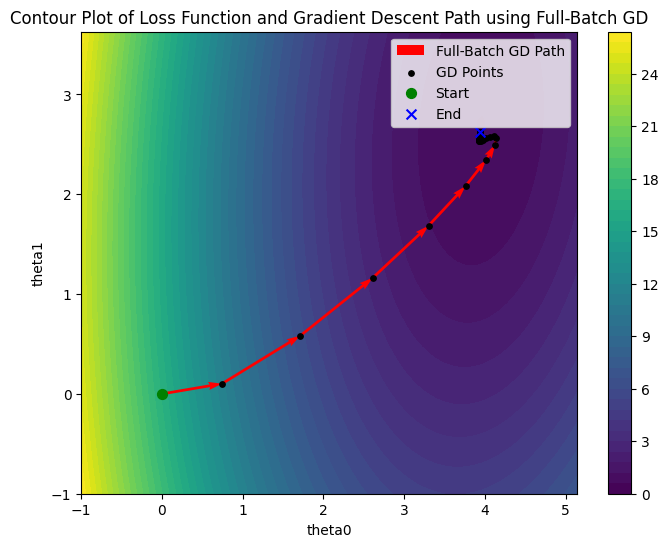

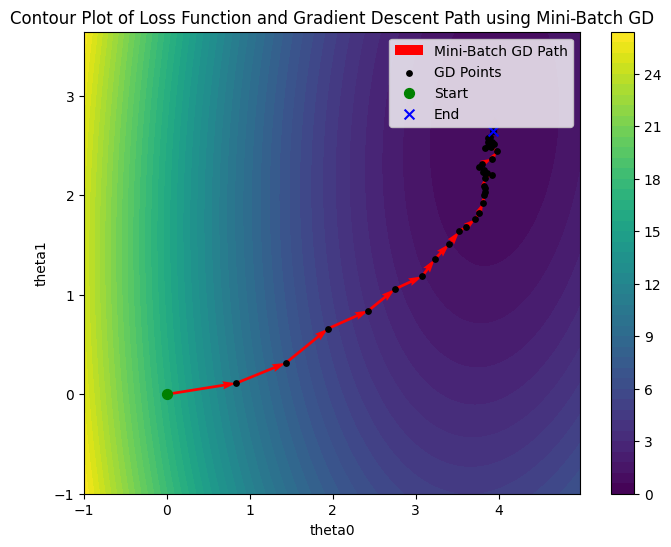

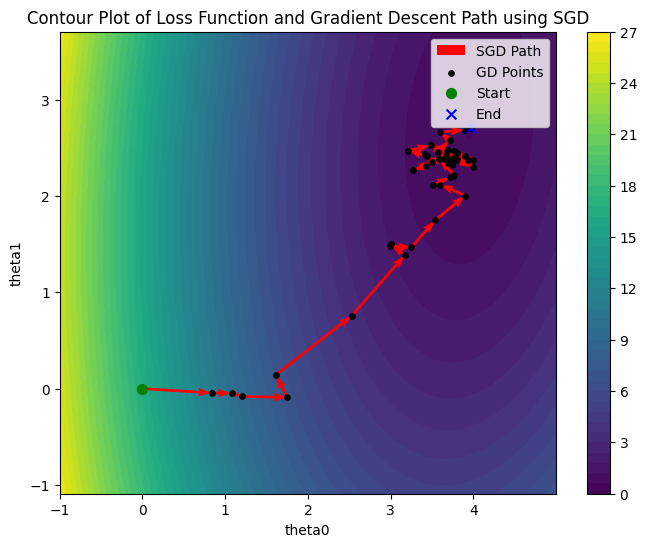

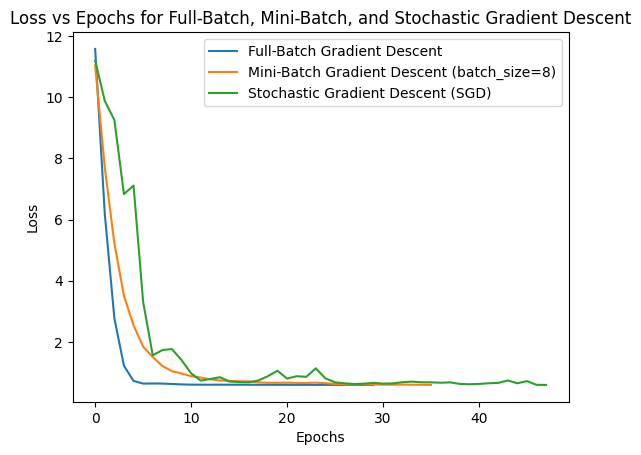

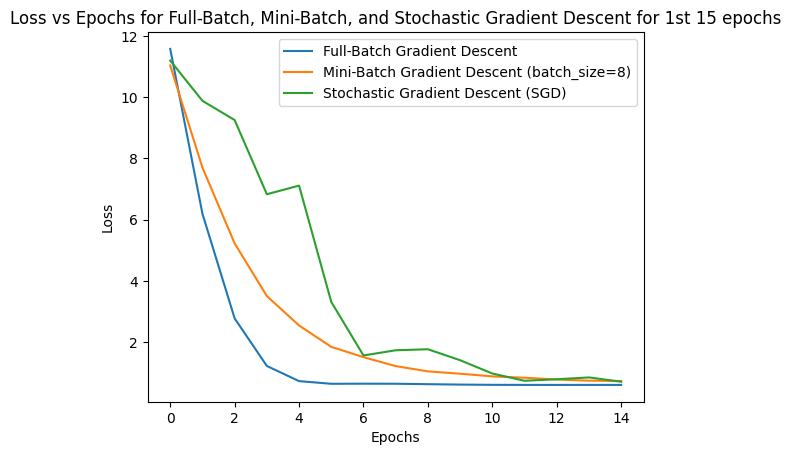

In [163]:
t0_i,t1_i=0,0
# Full Batch GD 
theta0_fb_o,theta1_fb_o,theta_0_s_fb,theta_1_s_fb,losses_fb,fb_epochs=all_gd_scratch_mom(x1,y,t0_i,t1_i,0.1,0.001,None,momentum_fb,b_loss,r_seed=45)
# Mini-Batch GD
theta0_mb_o,theta1_mb_o,theta_0_s_mb,theta_1_s_mb,losses_mb,mb_epochs=all_gd_scratch_mom(x1,y,t0_i,t1_i,0.1,0.001,8,momentum_mb,b_loss,r_seed=45)
#SGD
theta0_sgd_o,theta1_sgd_o,theta_0_s_sgd,theta_1_s_sgd,losses_sgd,sgd_epochs=all_gd_scratch_mom(x1,y,t0_i,t1_i,0.1,0.001,1,momentum_sgd,b_loss,r_seed=45)
print('optimal thetas for:\n')
print('for Full-Batch')
print(theta0_fb_o,theta1_fb_o)
print('for mini-batch')
print(theta0_mb_o,theta1_mb_o)
print('for sgd')
print(theta0_sgd_o,theta1_sgd_o)
print('\nfinal loss and epochs:\n')
print('for Full-Batch')
print(losses_fb[-1])
print(fb_epochs)
print('for mini-batch')
print(losses_mb[-1])
print(mb_epochs)
print('for sgd')
print(losses_sgd[-1])
print(sgd_epochs)
plot_gd_contour(x1,y,theta0_s=theta_0_s_fb,theta1_s=theta_1_s_fb,method="Full-Batch GD")
plot_gd_contour(x1,y,theta0_s=theta_0_s_mb,theta1_s=theta_1_s_mb,method="Mini-Batch GD")
plot_gd_contour(x1,y,theta0_s=theta_0_s_sgd,theta1_s=theta_1_s_sgd,method="SGD")
plt.plot(losses_fb, label='Full-Batch Gradient Descent')
plt.plot(losses_mb, label='Mini-Batch Gradient Descent (batch_size=8)')
plt.plot(losses_sgd, label='Stochastic Gradient Descent (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Full-Batch, Mini-Batch, and Stochastic Gradient Descent')
plt.legend()
plt.show()
plt.plot(losses_fb[:15], label='Full-Batch Gradient Descent')
plt.plot(losses_mb[:15], label='Mini-Batch Gradient Descent (batch_size=8)')
plt.plot(losses_sgd[:15], label='Stochastic Gradient Descent (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Full-Batch, Mini-Batch, and Stochastic Gradient Descent for 1st 15 epochs')
plt.legend()
plt.show()

In [164]:
methods=['Full-Batch','mini-batch','sgd']
print("With Momentum")
for i in methods:
    t_iters,avg_iters,t_epochs,avg_epochs=avg_iters_epochs_mom(method=i,cases=10)
    print(f"Avg number of Iterations for {i}=",avg_iters)
    print(f"Avg number of Epochs for {i}=",avg_epochs,'\n')


With Momentum
Avg number of Iterations for Full-Batch= 30
Avg number of Epochs for Full-Batch= 30 

Avg number of Iterations for mini-batch= 315
Avg number of Epochs for mini-batch= 63 

Avg number of Iterations for sgd= 4456
Avg number of Epochs for sgd= 111 



### Observations and summary

1. For number of Epochs and Iterations:
    Momentum significantly reduces the number of iterations and epochs needed for full-batch GD but the number of iterations and epochs increased both for mini-batch and SGD. So, it is clear by this that using momentum for GD calculatuion is beneficial for larger batches whereas the smaller batches struggle more due to noise.

2. Optimum theta0 and theta1:
    Momentum helps achieve better theta optimums irrespective of the batch size compared to GD without momentum. The main reason is that momentum optimizes the step-size and thus improves the efficiency of the process and helps take efficient steps near the optimum solution.

3. Loss and Epochs:
    Momentum helps reduce the loss for each method of GD, but shows a significant improvement in SGD and Mini-Batch. The reason being that momentum helps avoid the local minimas especially in noisy GD.

Using momentum can also result in shooting up in GD sometimes as momentum accelerates the step-size when goin in same direction like it did for the Full-Batch GD here. But overall it still reduces the number of epochs(steps) required as the step-size compensates the over-shooting.Thus overall, momentum is useful in optimizing GD .